## Preliminary Steps.

**Download file from Drive to Colab.**

In [0]:
# # Install the PyDrive wrapper & import libraries.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # Download a file based on its file ID.
# file_id = '1K5WrDIn6gAEilg89xbMb2vbixXnR-HNb'
# downloaded = drive.CreateFile({'id': file_id})
# downloaded.GetContentFile('train.csv')

**Import Libraries.**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

**Some Notebook Settings.**

In [0]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy=True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

**Read Data.**

In [0]:
df = pd.read_csv('train.csv')
df.drop_duplicates(inplace=True)
df.shape

(1460, 81)

81 columns and 1460 rows.
<hr>

## Data Cleaning.

In [0]:
df.drop(['Id'], axis=1, inplace=True)

In [0]:
round(df.isnull().sum()/len(df), 2).sort_values(ascending=False)[0:20]

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
GarageYrBlt     0.06
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
BsmtQual        0.03
MasVnrArea      0.01
MasVnrType      0.01
RoofStyle       0.00
RoofMatl        0.00
dtype: float64

It seems we have less than 20 columns with missing values.

In [0]:
df.columns[df.isnull().sum()/len(df)>.50]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

If a home does not have alley access, then that is reported as a missing value. We can just impute those values with something like 'NoAlley'.

In [0]:
df.fillna(value={'Alley':'NoAlley'}, inplace=True)
f = {'mean', 'median', 'size'}
df.groupby('Alley')['SalePrice'].agg(f)

,mean,median,size
Alley,,,
Grvl,122219.08,119500,50
NoAlley,183452.13,165000,1369
Pave,168000.59,172500,41


If a home does not have a pool, then that is reported as a missing value. We can just impute those values with something like 'NoPool'.

In [0]:
df.fillna(value={'PoolQC': 'NoPool'}, inplace=True)
df.groupby('PoolQC')['SalePrice'].agg(f)

,mean,median,size
PoolQC,,,
Ex,490000.00,490000,2
Fa,215500.00,215500,2
Gd,201990.00,171000,3
NoPool,180404.66,162900,1453


If a home does not have fence, then that is reported as a missing value. We can just impute those values with something like 'NoFence'.

In [0]:
df.fillna(value={'Fence': 'NoFence'}, inplace=True)
df.groupby('Fence')['SalePrice'].agg(f)

,mean,median,size
Fence,,,
GdPrv,178927.46,167500,59
GdWo,140379.31,138750,54
MnPrv,148751.09,137450,157
MnWw,134286.36,130000,11
NoFence,187596.84,173000,1179


If a home does not have any miscellaneous feature, it is reported as a missing value. We can just impute it with something like 'NoMiscFeatr'.

In [0]:
df.fillna(value={'MiscFeature': 'NoMiscFeatr'}, inplace=True)
df.groupby('MiscFeature')['SalePrice'].agg(f)

,mean,median,size
MiscFeature,,,
Gar2,170750.00,170750,2
NoMiscFeatr,182046.41,164250,1406
Othr,94000.00,94000,2
Shed,151187.61,144000,49
TenC,250000.00,250000,1


Now, let's deal with columns with less than 50% missing values.

In [0]:
df.fillna(value={'FireplaceQu': 'NoFirePlace'}, inplace=True)
df.groupby('FireplaceQu')['SalePrice'].agg(f)

,mean,median,size
FireplaceQu,,,
Ex,337712.50,314250,24
Fa,167298.48,158000,33
Gd,226351.42,206950,380
NoFirePlace,141331.48,135000,690
Po,129764.15,131500,20
TA,205723.49,187500,313


In [0]:
df['LotFrontage'].agg(f)

mean        70.05
median      69.00
size      1460.00
Name: LotFrontage, dtype: float64

We can impute the missing values in `LotFrontage` with the median value.

In [0]:
df.fillna(value={'LotFrontage': df['LotFrontage'].median()}, inplace=True)
df['LotFrontage'].isnull().sum()

0

If the home does not have a garage, it is reported as a missing value. We can just impute it with something like 'NoGarage'.

In [0]:
df.fillna(value={'GarageType':'NoGarage', 'GarageCond':'NoGarage', 'GarageYrBlt':'NoGarage', 'GarageFinish':'NoGarage', 'GarageQual':'NoGarage'}, inplace=True)

If house has no basement, it is reported as a missing value. We can replace it with something like 'NoBsmt'.

In [0]:
df.fillna(value={'BsmtFinType2':'NoBsmt', 'BsmtFinType1':'NoBsmt', 'BsmtExposure':'NoBsmt', 'BsmtCond':'NoBsmt', 'BsmtQual':'NoBsmt'}, inplace=True)

Now, let's deal with missing values of Masonry Veneer and Electrical columns.

In [0]:
df = df[~(df['MasVnrType'].isnull()|df['MasVnrArea'].isnull()|df['Electrical'].isnull())]
df.isnull().sum().sum() # Check if any null value remains.

0

Finally, all the missing values have been dealt with.
<hr>

Let's create dictionary of data-type of columns and their column names.

In [0]:
g = df.columns.to_series().groupby(df.dtypes).groups
g = {k.name: v for k, v in g.items()}
# g # See the dictionary.

Some columns must be categorical , but are stored as type `int`.

In [0]:
df['MSSubClass'] = df['MSSubClass'].astype(object)
df['OverallQual'] = df['OverallQual'].astype(object)
df['OverallCond'] = df['OverallCond'].astype(object)

Let's create the column-data type dictionary again.

In [0]:
g = df.columns.to_series().groupby(df.dtypes).groups
g = {k.name: v for k, v in g.items()}

Now we can create dummies for categorical columns.

In [0]:
for col in g['object']:
  dummy = pd.get_dummies(df[col], prefix=col, drop_first=True)
  df = pd.concat([df, dummy], axis=1)
  df.drop(col, axis=1, inplace=True)

**Train-Test Split.**

In [0]:
# Splitting the data into train and test.

from sklearn.model_selection import train_test_split
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=47)

**Price of Homes.**

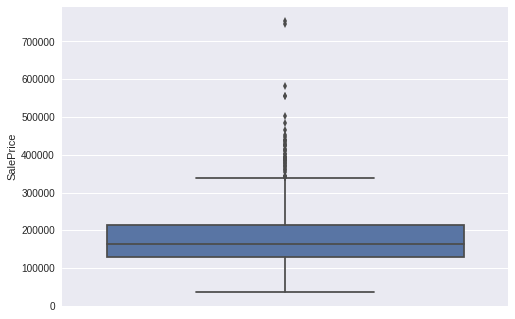

In [0]:
sns.boxplot(y = y_train)

In [0]:
X_train.shape, X_test.shape

((1088, 383), (363, 383))

Retained Rows.

In [0]:
(1088+363)/1460*100

99.38356164383562

<hr>

## Modelling.

**Standardise the values.**

In [0]:
from sklearn.preprocessing import StandardScaler # import.
scaler = StandardScaler() # instantiate.
X_train = scaler.fit_transform(X_train) # fit and transform.
X_test = scaler.transform(X_test) # transform.

**Correlation Heatmap.**

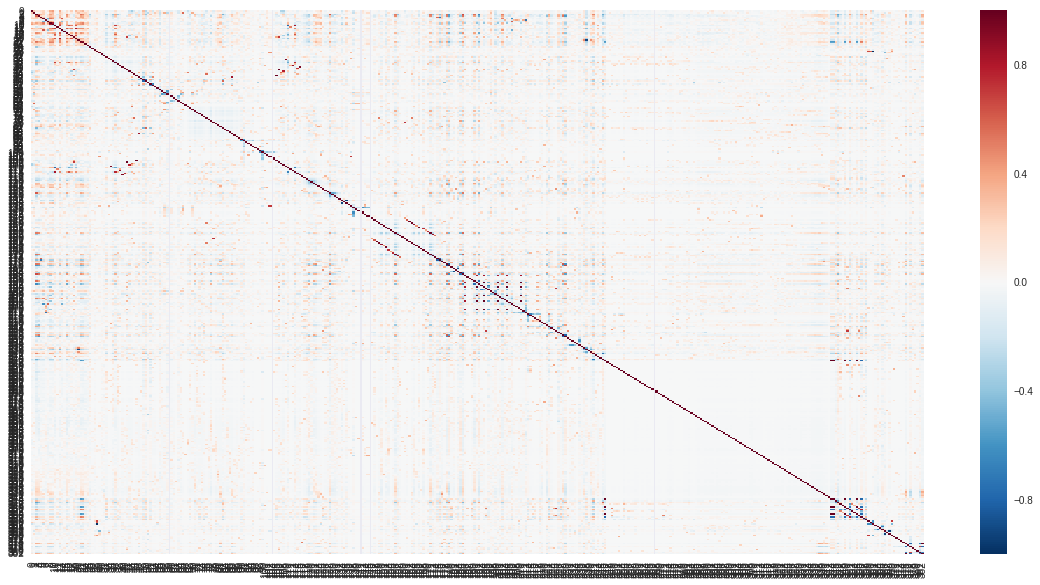

In [0]:
plt.figure(figsize = (20,10))
corrmat = np.corrcoef(X_train.T)
sns.heatmap(corrmat,annot = False)
plt.show()

We do have some correlated features.<hr>

# Lasso Regression.

We use Lasso Regression for feature elimination.

In [0]:
from sklearn import linear_model # import.
lr_lasso = linear_model.Lasso(random_state=123) # instantiate.

In [0]:
# Perform cross-validation.
from sklearn.model_selection import GridSearchCV
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
model_cv = GridSearchCV(estimator = lr_lasso, param_grid = hyperparameters, cv=10, scoring= 'neg_mean_absolute_error')
#lr.get_params().keys() # hyperparameters that we can set.

In [0]:
model_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [0]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,split5_test_score,split5_train_score,split6_test_score,split6_train_score,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.08,9.12e-04,-23030.82,-11392.22,0.001,{'alpha': 0.001},7,-18701.90,-11438.73,-20603.32,-11591.49,-24922.40,-11593.07,-17723.46,-11480.49,-22003.79,-11738.37,-33702.84,-10907.75,-21708.46,-11159.61,-23594.96,-11193.06,-28586.76,-11219.88,-18772.22,-11599.70,0.05,3.24e-05,4715.45,247.20
1,1.07,8.81e-04,-23028.66,-11392.21,0.01,{'alpha': 0.01},6,-18701.08,-11438.70,-20596.56,-11591.50,-24919.34,-11593.06,-17723.26,-11480.51,-22003.47,-11738.35,-33697.23,-10907.72,-21705.94,-11159.64,-23593.36,-11193.08,-28586.84,-11219.86,-18771.50,-11599.68,0.05,3.20e-05,4714.63,247.19
2,1.08,8.93e-04,-23008.50,-11392.24,0.1,{'alpha': 0.1},5,-18693.69,-11438.35,-20528.94,-11591.67,-24896.44,-11593.14,-17720.85,-11480.75,-22000.31,-11738.21,-33638.94,-10907.64,-21680.92,-11159.91,-23582.17,-11193.37,-28590.42,-11219.71,-18764.58,-11599.61,0.06,2.00e-05,4706.67,247.17
3,1.15,8.94e-04,-22833.11,-11393.24,1,{'alpha': 1},4,-18590.27,-11434.95,-19854.77,-11594.54,-24673.68,-11595.78,-17680.31,-11483.58,-21972.45,-11738.21,-33301.15,-10907.16,-21440.21,-11162.46,-23505.99,-11197.11,-28638.63,-11218.63,-18688.88,-11599.99,0.12,2.86e-05,4694.05,247.32
4,1.06,8.87e-04,-22332.16,-11410.79,10,{'alpha': 10},3,-17845.09,-11436.10,-20426.15,-11626.85,-23748.37,-11630.68,-17351.88,-11498.12,-21552.02,-11744.31,-32165.41,-10903.08,-21043.65,-11224.16,-23002.84,-11231.17,-28108.01,-11221.66,-18092.28,-11591.77,0.07,1.77e-05,4485.78,246.56


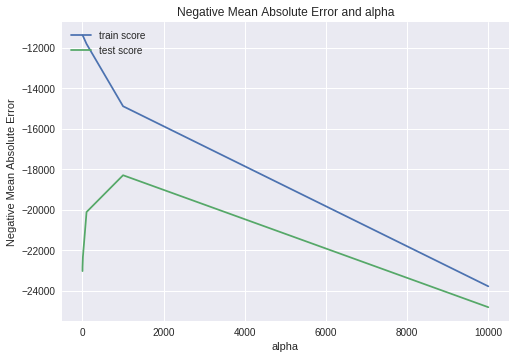

In [0]:
# Plotting mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

It seems that alpha=1000 shows high train and test score.

In [0]:
alpha = 1000
lasso = linear_model.Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
coefficients = lasso.coef_
(coefficients!=0).sum() # Number of features selected.

107

In [0]:
lasso.score(X_train, y_train) # R-squared score on train dataset.

0.8997371348789307

In [0]:
lasso.score(X_test, y_test) # R-squared score on test dataset.

0.8729244399714109

<hr>

# Ridge Regresion.

We use Ridge Regression to treat Multi-Collinearity.

In [0]:
lr_rdg = linear_model.Ridge(random_state=123) # instantiate.

In [0]:
# Perform cross-validation.
from sklearn.model_selection import GridSearchCV
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
model_cv = GridSearchCV(estimator = lr_rdg, param_grid = hyperparameters, cv=10, scoring= 'neg_mean_absolute_error')
#lr_rdg.get_params().keys() # hyperparameters that we can set.

In [0]:
model_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [0]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,split5_test_score,split5_train_score,split6_test_score,split6_train_score,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.02,6.09e-04,-23026.32,-11381.78,0.001,{'alpha': 0.001},7,-18940.78,-11435.17,-20542.51,-11578.94,-25636.24,-11580.48,-17820.37,-11451.92,-21482.34,-11733.61,-33768.40,-10883.52,-21461.66,-11155.03,-23409.26,-11189.88,-28179.61,-11215.43,-19032.71,-11593.88,9.33e-03,4.63e-05,4686.83,248.81
1,0.03,9.01e-04,-23014.75,-11381.96,0.01,{'alpha': 0.01},6,-18927.06,-11435.55,-20547.03,-11579.52,-25622.41,-11580.66,-17813.97,-11452.80,-21475.11,-11733.63,-33739.71,-10883.71,-21445.24,-11154.56,-23394.04,-11189.77,-28176.90,-11215.31,-19016.70,-11594.11,7.35e-03,5.96e-04,4682.87,248.95
2,0.03,6.42e-04,-22920.41,-11385.46,0.1,{'alpha': 0.1},5,-18808.83,-11440.70,-20570.16,-11586.47,-25514.13,-11583.32,-17765.38,-11462.42,-21430.06,-11735.24,-33475.41,-10884.28,-21292.24,-11156.20,-23322.51,-11194.54,-28149.07,-11214.13,-18887.23,-11597.31,8.85e-03,1.32e-04,4645.14,250.06
3,0.03,1.60e-03,-22450.80,-11442.47,1,{'alpha': 1},4,-18215.21,-11518.63,-20734.77,-11664.55,-25062.69,-11611.85,-17748.81,-11531.63,-20728.32,-11795.66,-31728.96,-10896.35,-20533.29,-11242.26,-23463.85,-11291.23,-27890.57,-11218.64,-18414.43,-11653.94,7.97e-03,2.48e-03,4351.78,259.33
4,0.03,6.09e-04,-21666.98,-12031.65,10,{'alpha': 10},3,-17313.08,-12280.87,-21030.65,-12428.14,-23783.77,-11701.89,-18407.67,-12210.94,-17586.47,-12495.03,-26954.03,-11481.82,-22628.51,-12028.05,-23972.38,-12074.93,-26670.77,-11314.60,-18337.89,-12300.18,8.46e-03,4.35e-05,3483.10,382.80


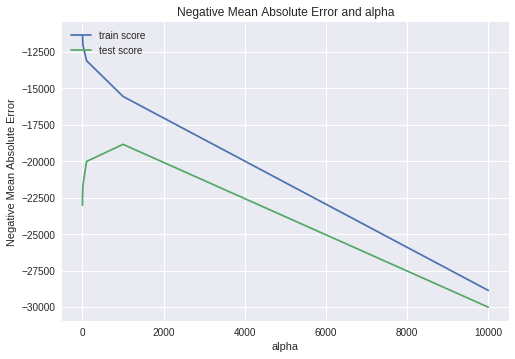

In [0]:
# Plotting mean test and train scoes with alpha.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting.
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

It seems that alpha=1000 is suggested for high train and test scores.

In [0]:
alpha = 1000
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(X_train, y_train) 

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
coefficients = ridge.coef_
(coefficients!=0).sum() # Number of features selected.

378

In [0]:
ridge.score(X_train, y_train) # R-squared score on train dataset.

0.879291874382665

In [0]:
ridge.score(X_test, y_test) # R-squared score on test dataset.

0.86756737178318

<hr>

# Important features.

In [0]:
features = pd.DataFrame(df.drop(['SalePrice'], axis=1).columns, lasso.coef_).reset_index().sort_values(by='index', ascending=False)
features.rename(columns={'index':'Coefficient', 0:'Feature'}, inplace=True)
features = features[~(features['Coefficient']==0)]

Let's look at 20 most importnat features which drive up the price of a home.

In [0]:
features.head(20)

,Coefficient,Feature
12,25336.67,GrLivArea
123,13101.91,OverallQual_9
124,10703.64,OverallQual_10
122,8170.99,OverallQual_8
2,6412.06,YearBuilt
28,6100.69,PoolArea
81,5869.84,Neighborhood_NridgHt
21,5816.59,GarageCars
20,5422.60,Fireplaces
375,4929.87,SaleType_New


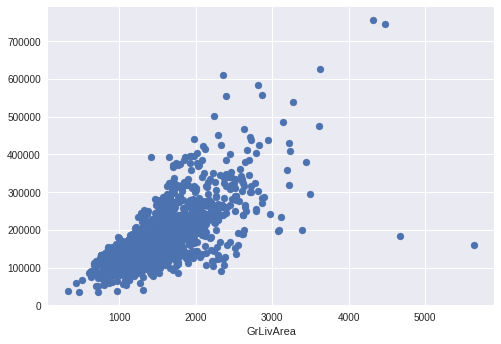

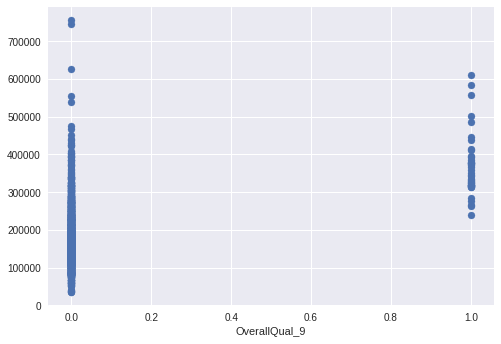

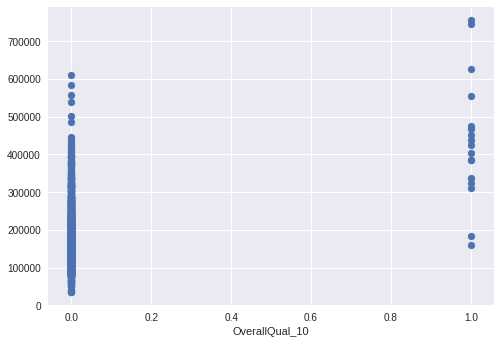

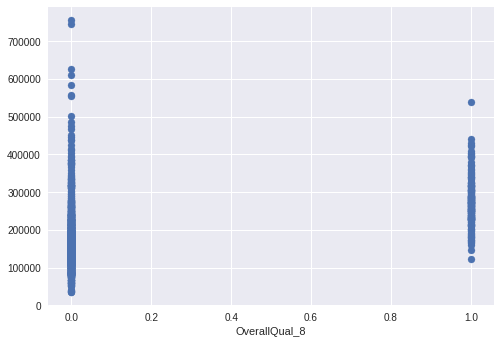

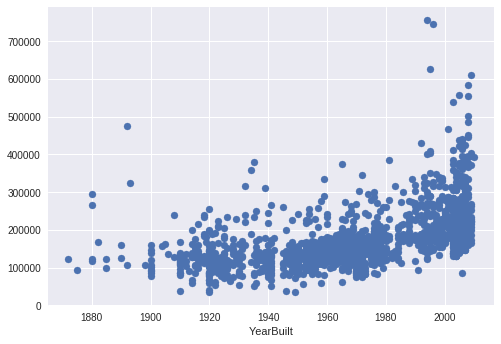

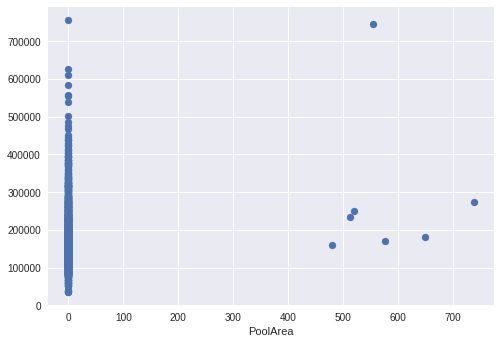

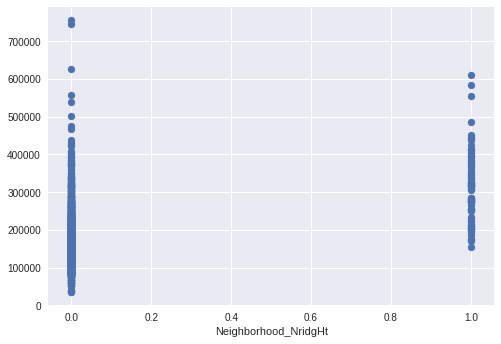

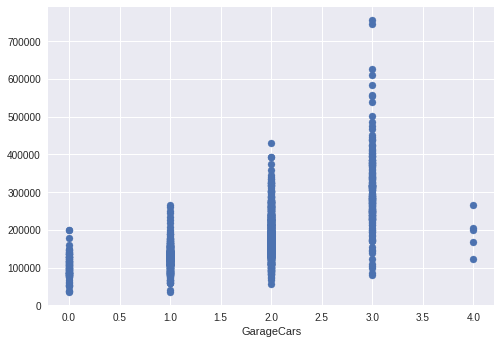

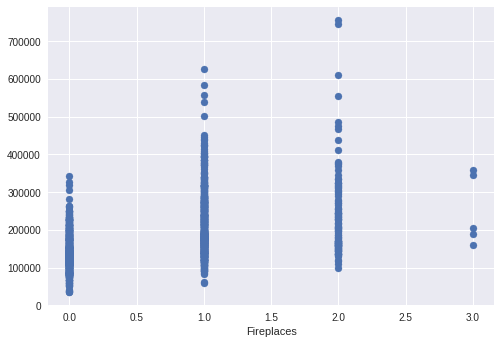

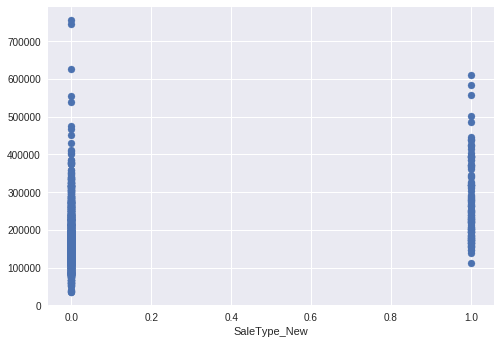

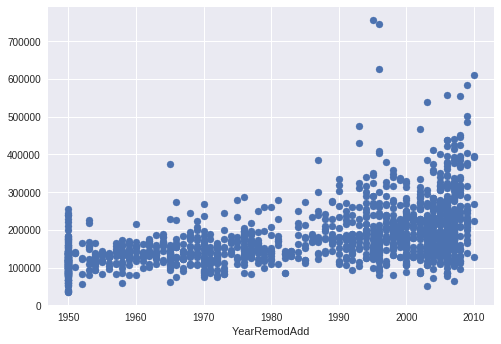

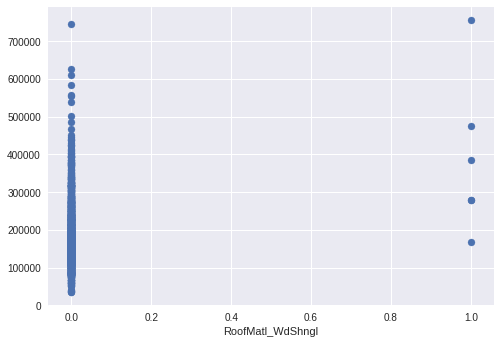

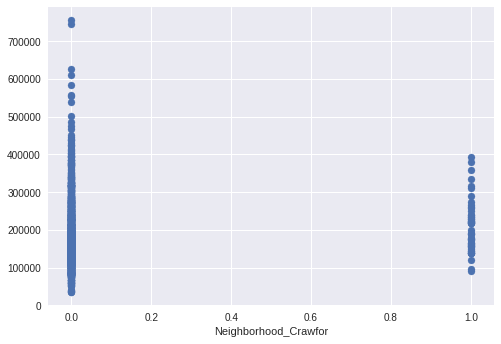

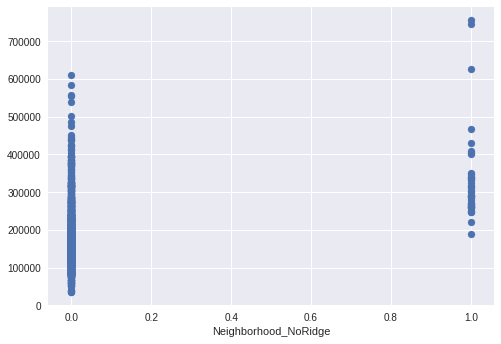

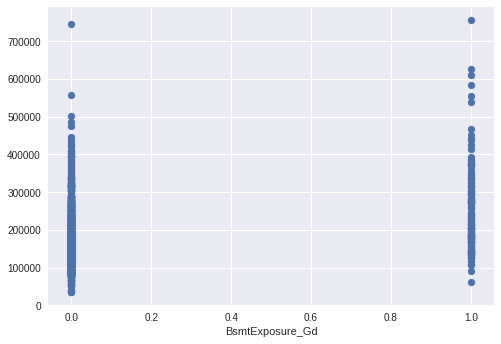

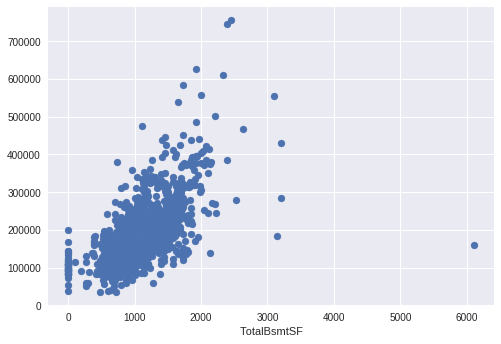

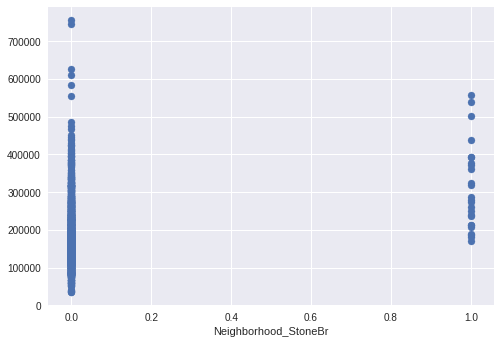

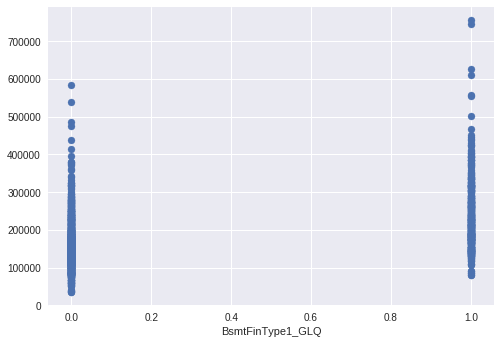

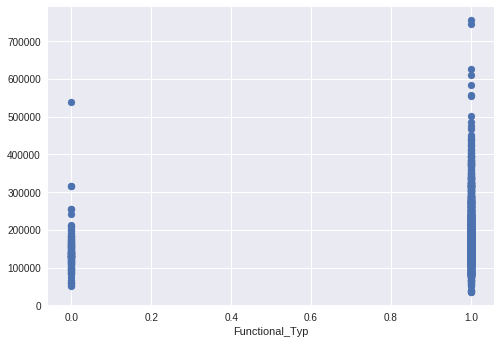

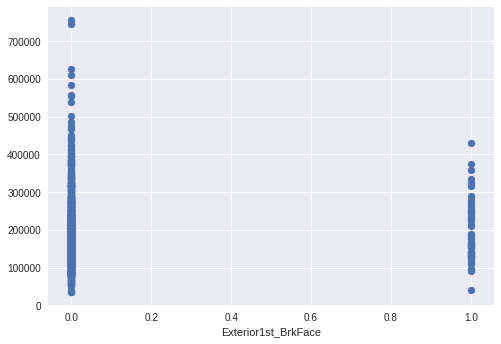

In [0]:
for i, col in enumerate(features.head(20)['Feature']):
  plt.figure(i)
  plt.scatter(y=df['SalePrice'], x=df[col])
  plt.xlabel(col)
  plt.show()

Above ground Living area, Overall Quality Indices, Good Neighbourhood, Age of Home (newer are better), Basement Square Footage, Pool Area, etc. seem to drive up the price.<br><br>
Now let us look at 20 of the most important features which drive the price down of a home.

In [0]:
features.tail(20)

,Coefficient,Feature
313,-688.27,GarageYrBlt_1981.0
111,-726.60,HouseStyle_2.5Fin
206,-767.00,BsmtFinType1_Unf
133,-800.72,RoofStyle_Gable
234,-845.16,Functional_Sev
82,-951.08,Neighborhood_OldTown
90,-1026.56,Condition1_Feedr
126,-1796.41,OverallCond_3
54,-1871.41,LotShape_IR3
127,-1926.81,OverallCond_4


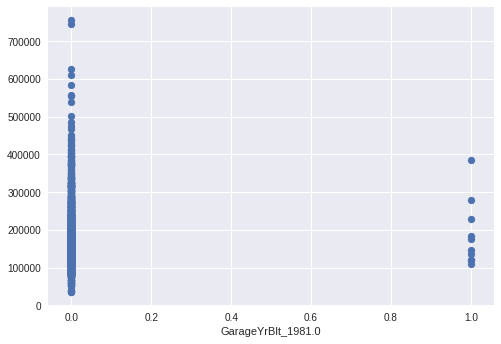

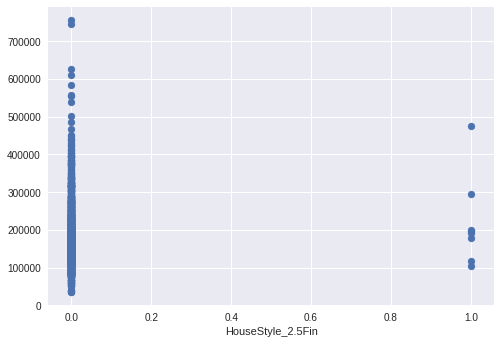

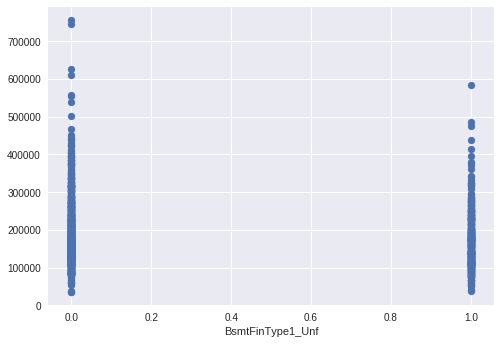

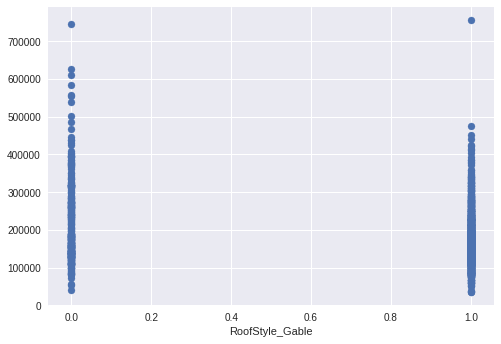

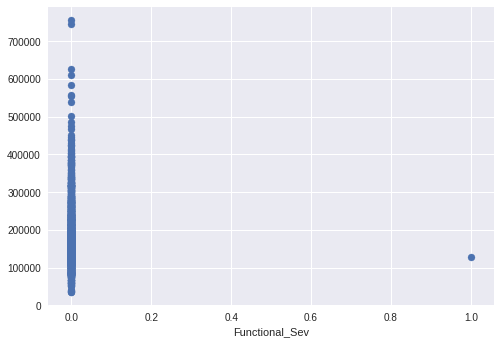

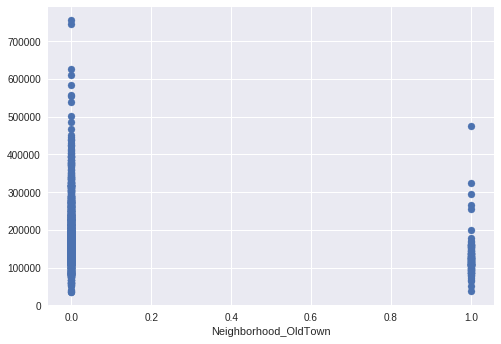

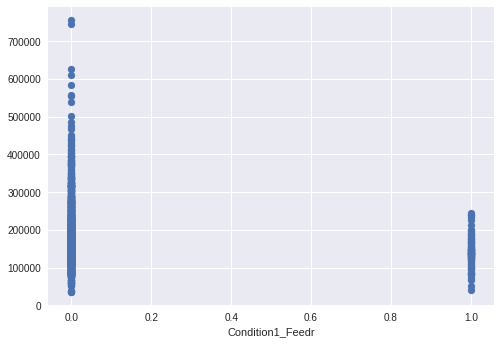

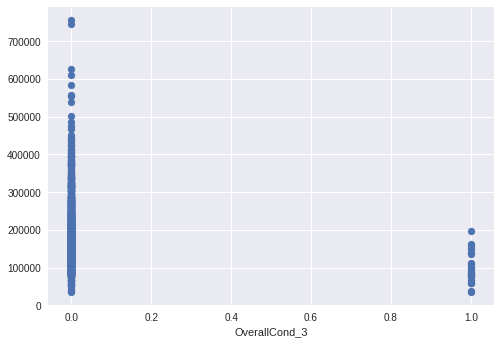

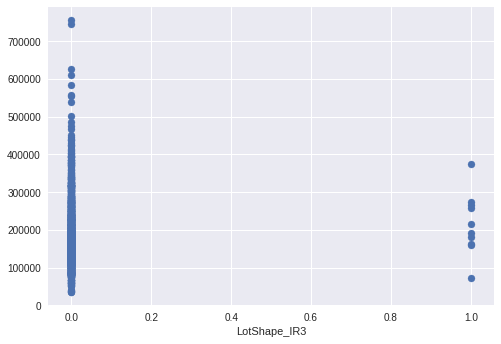

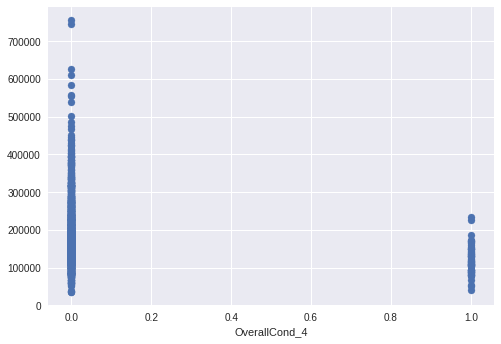

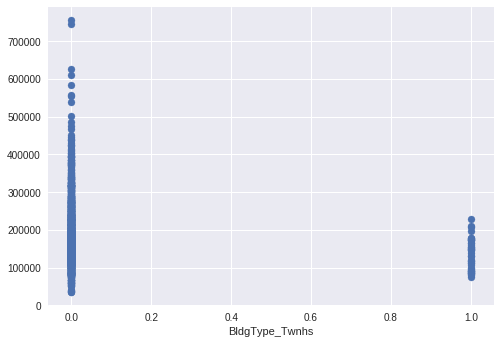

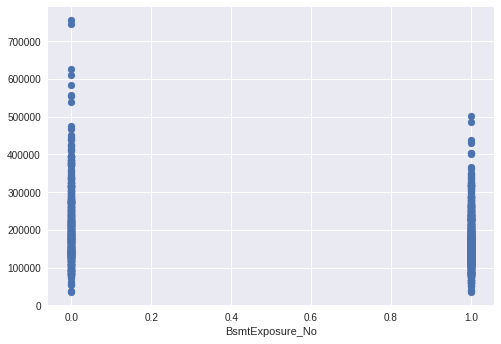

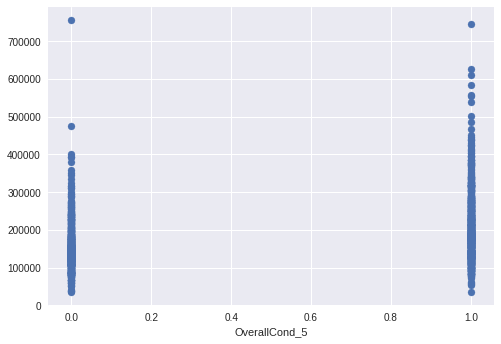

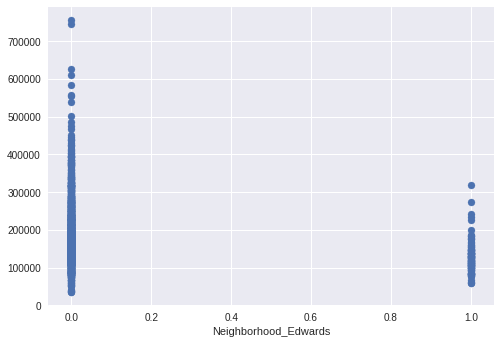

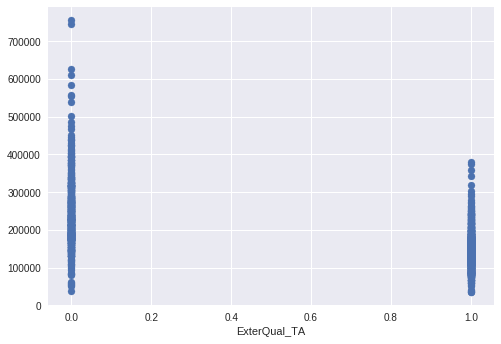

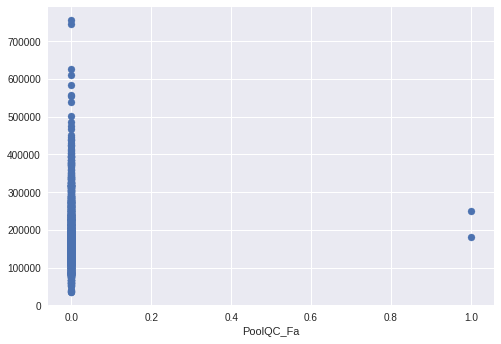

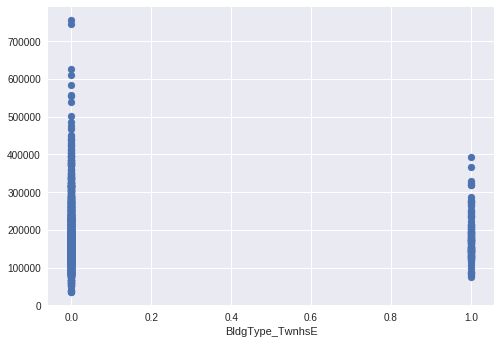

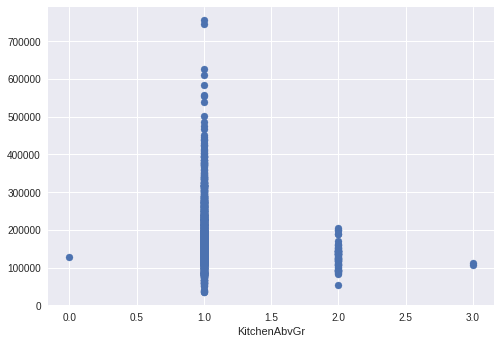

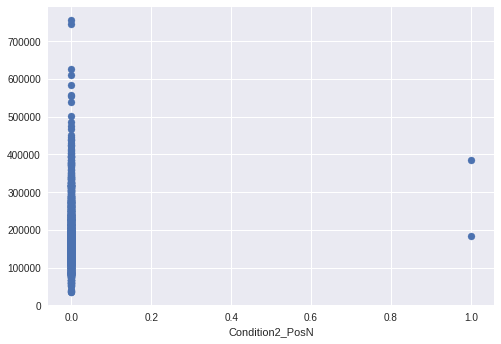

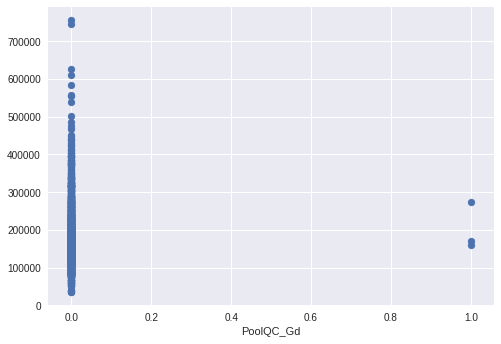

In [0]:
for i, col in enumerate(features.tail(20)['Feature']):
  plt.figure(i)
  plt.scatter(y=df['SalePrice'], x=df[col])
  plt.xlabel(col)
  plt.show()

It seems that if overall quality indices are low, neighbourhood is bad, or the pool quality is bad, the price goes down.<hr>